In [1]:
import finesse.virgo
import finesse.analysis.actions as fa
from finesse.virgo.actions import DARM_RF_to_DC

In [2]:
# simple make, can be configured, returns Finesse model
model = finesse.virgo.make_virgo(
    maxtem="off",
    thermal_state="design-matched",
    use_3f_error_signals=False,
    with_apertures=False,
    x_scale=1,
    zero_k00=False,
    display_plots=False,
    verbose=False,
)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


In [3]:
# can also make from a modified model
virgo = finesse.virgo.Virgo()
virgo.model.parse("var test 1")
virgo.make()
print('test =', virgo.model.test.value)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.
test = 1.0


In [4]:
# or make step by step
virgo = finesse.virgo.Virgo()
virgo.model.parse("var state 0")
# virgo.adjust_recycling_cavities()
virgo.adjust_recycling_cavity_length("PRC", "lPRC", "lPOP_BS")
virgo.adjust_recycling_cavity_length("SRC", "lSRC", "lsr")
virgo.pretune() # now in pretuned state

# and modify the model in between
virgo.model.state.value += 1

virgo.apply_dc_offset()
virgo.optimize_demodulation_phase()
virgo.model.run(fa.RunLocks(method="newton"))
virgo.model.state.value += 1

virgo.model.run(DARM_RF_to_DC()) # now in dc locked state
virgo.model.state.value += 1

print('state =', virgo.model.state.value)

state = 3.0


In [5]:
# the model is accessible and can be replaced, but this breaks state
#   meaning configurable settings are potentially wrong
#   and would need to be set manually
virgo = finesse.virgo.Virgo()
virgo.print_thermal_values()

virgo.model = finesse.virgo.make_virgo(thermal_state="cold")
virgo.print_thermal_values()

print(virgo.thermal_state) # should be "cold"
virgo.thermal_state = "cold"

virgo.model.parse("var test 1")
virgo.model.unparse()
virgo.model.mismatches_table()

┌───────────────────╥─────────────┐
│ Thermal Parameter ║    Value    │
╞═══════════════════╬═════════════╡
│      PR.Rcx       ║    -1430.00 │
│      PR.Rcy       ║    -1430.00 │
│      SR.Rcx       ║     1430.00 │
│      SR.Rcy       ║     1430.00 │
│     f_CPN_TL      ║  -338008.00 │
│     f_CPW_TL      ║  -353134.00 │
└───────────────────╨─────────────┘

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.
┌───────────────────╥─────────────┐
│ Thermal Parameter ║    Value    │
╞═══════════════════╬═════════════╡
│      PR.Rcx       ║    -1477.00 │
│      PR.Rcy       ║    -1477.00 │
│      SR.Rcx       ║     1443.00 │
│      SR.Rcy       ║     1443.00 │
│     f_CPN_TL      ║         inf │
│     f_CPW_TL      ║         inf │
└───────────────────╨─────────────┘

None


Intent-preserving regeneration of KatScript for operations has not been implemented yet. These have instead been generated using default formatting (this does not affect the validity of the generated KatScript).
Intent-preserving regeneration of KatScript for nonsingular commands has not been implemented yet. These have instead been generated using default formatting (this does not affect the validity of the generated KatScript).


Coupling,Mismatch (x),Mismatch (y)
BS.p1.i -> BS.p2.o,0.0000,0.0000
BS.p2.i -> BS.p1.o,0.0000,0.0000
BS.p2.i -> BS.p4.o,0.0044,0.0044
BS.p3.i -> BS.p4.o,0.0042,0.0042
BS.p4.i -> BS.p2.o,0.0044,0.0044
BS.p4.i -> BS.p3.o,0.0042,0.0042
NI.p1.i -> NI.p1.o,0.0131,0.0131
NI.p1.i -> NI.p2.o,0.0065,0.0065
NI.p2.i -> NI.p1.o,0.0065,0.0065
NIAR.p1.i -> NIAR.p1.o,0.0133,0.0133


Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Switching to DARM DC lock...
Done.


<Axes: title={'center': 'Quantum Noise Limited Sensitivity'}, xlabel='fsig.f [Hz]', ylabel='ASD [1/$\\sqrt{Hz}$]'>

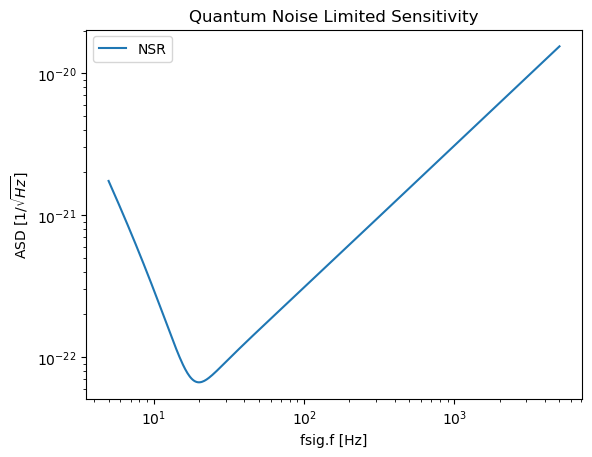

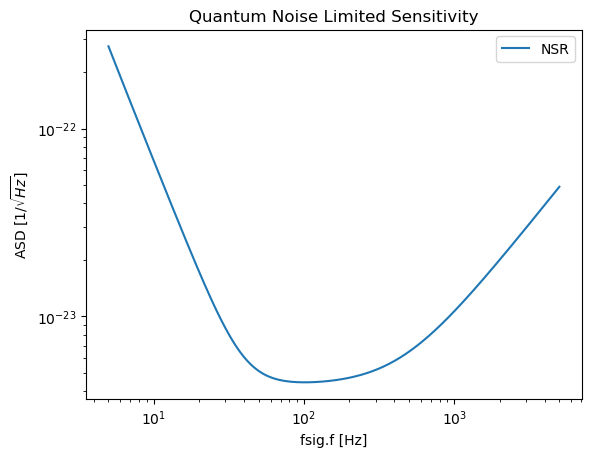

In [6]:
virgo = finesse.virgo.Virgo()
virgo.plot_QNLS()
virgo.make()
virgo.plot_QNLS()

In [7]:
# can be more verbose and display plots
virgo = finesse.virgo.Virgo(verbose=True, display_plots=True)
virgo.make()

Parsing common katfile...
Parsing additional katscript...
Adding locks for ['PRCL_lock', 'MICH_lock', 'CARM_lock', 'DARM_lock', 'SRCL_lock'].
Adjusting recycling cavity lengths...
——  adjusting PRC length
    adjusting lPOP_BS.L by 0.0004736 m
——  adjusting SRC length
    adjusting lsr.L by 0.000883 m
Pretuning...
Optimizing demodulation phases...
--  Optimized demodulation phases:
--  Suggested lock gains:
Optimizing lock gains...
--  Optimized lock gains:
    PRCL     B2_8_I    :     -63.74
    MICH     B2_56_Q   :     1992.7
    CARM     B2_6_I    :   -0.16133
    DARM     B1p_56_I  : -0.0065679
    SRCL     B2_56_I   :    -3812.2
Running RF locks...
——  DOFs before locking:
    PRCL: 0.0008000000000000001
    MICH: 0.0002
    CARM: 0.0
    DARM: 0.0
    SRCL: 89.99400000000001
——  DOFs after locking:
    PRCL: 0.0008020402175891171
    MICH: 0.00019048099054478807
    CARM: 2.4154691900169917e-06
    DARM: 2.454336320812162e-07
    SRCL: 89.99286008149673
Switching to DARM DC lock.

┌───────────┬────────────┬──────────────┬──────────────┬──────────────┐
│ Optic/DOF │  phi [deg] │ dof.DC [deg] │ Tuning [deg] │  Tuning [pm] │
╞═══════════╪════════════╪══════════════╪══════════════╪══════════════╡
│ NE        │    -0.0002 │              │      -0.0004 │     -1.18222 │
│ WE        │     0.0002 │              │       0.0004 │      1.18222 │
│ NI        │    -0.0002 │              │      -0.0004 │     -1.18222 │
│ WI        │     0.0002 │              │       0.0004 │      1.18222 │
│ PR        │     0.0008 │              │       0.0016 │      4.72889 │
│ SR        │     -89.99 │              │     -179.988 │      -531965 │
│ PRCL      │            │       0.0008 │              │              │
│ MICH      │            │       0.0002 │              │              │
│ CARM      │            │            0 │              │              │
│ DARM      │            │            0 │              │              │
│ SRCL      │            │        89.99 │              │        

<Axes: title={'center': 'Quantum Noise Limited Sensitivity'}, xlabel='fsig.f [Hz]', ylabel='ASD [1/$\\sqrt{Hz}$]'>

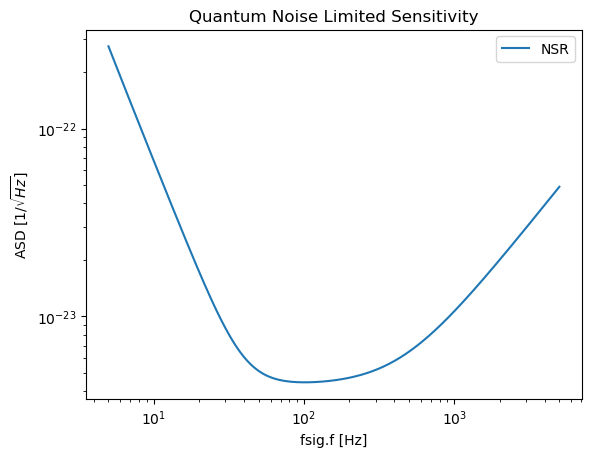

In [8]:
# individual steps can also be made verbose
# TODO: can improve verbosity
virgo = finesse.virgo.Virgo()

# adjust the recycling cavity lengths
virgo.adjust_PRC_length()
virgo.adjust_SRC_length()

# pretune by maximizing cavity power and minimizing dark fringe
virgo.pretune(verbose=True) # now in pretuned state

# prepare to run the locks
virgo.optimize_demodulation_phase()
virgo.optimize_lock_gains()

# run the locks
virgo.model.run(fa.RunLocks(method="newton")) # now in rf locked state

# switch DARM to a DC lock with offset
virgo.model.run(DARM_RF_to_DC()) # now in dc locked state

virgo.plot_QNLS()

In [9]:
# similar to a Finesse model, Virgo can also be deepcopied for branching purposes.
virgo1 = finesse.virgo.Virgo()
virgo1.model.parse('var test 0')

virgo2 = virgo1.deepcopy()
virgo2.model.test.value = 1

print('virgo1.test =', virgo1.model.get('test').value)
print('virgo2.test =', virgo2.model.get('test').value)

virgo1.test = 0.0
virgo2.test = 1.0
